In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns
%matplotlib inline

In [ ]:
sales_of_company = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv", index_col='Month')
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv",  index_col='Month')
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv",  index_col='Month')
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv",  index_col='Month')
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv",  index_col='Week')
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv",  index_col='Date')

In [ ]:
ts_dict = {'sales_of_company': sales_of_company, 
           'robberies_in_boston': robberies_in_boston,
           'airlines_passengers': airlines_passengers,
           'mean_monthly_temp': mean_monthly_temp,
           'dowjones_closing': dowjones_closing,
           'female_births': female_births}

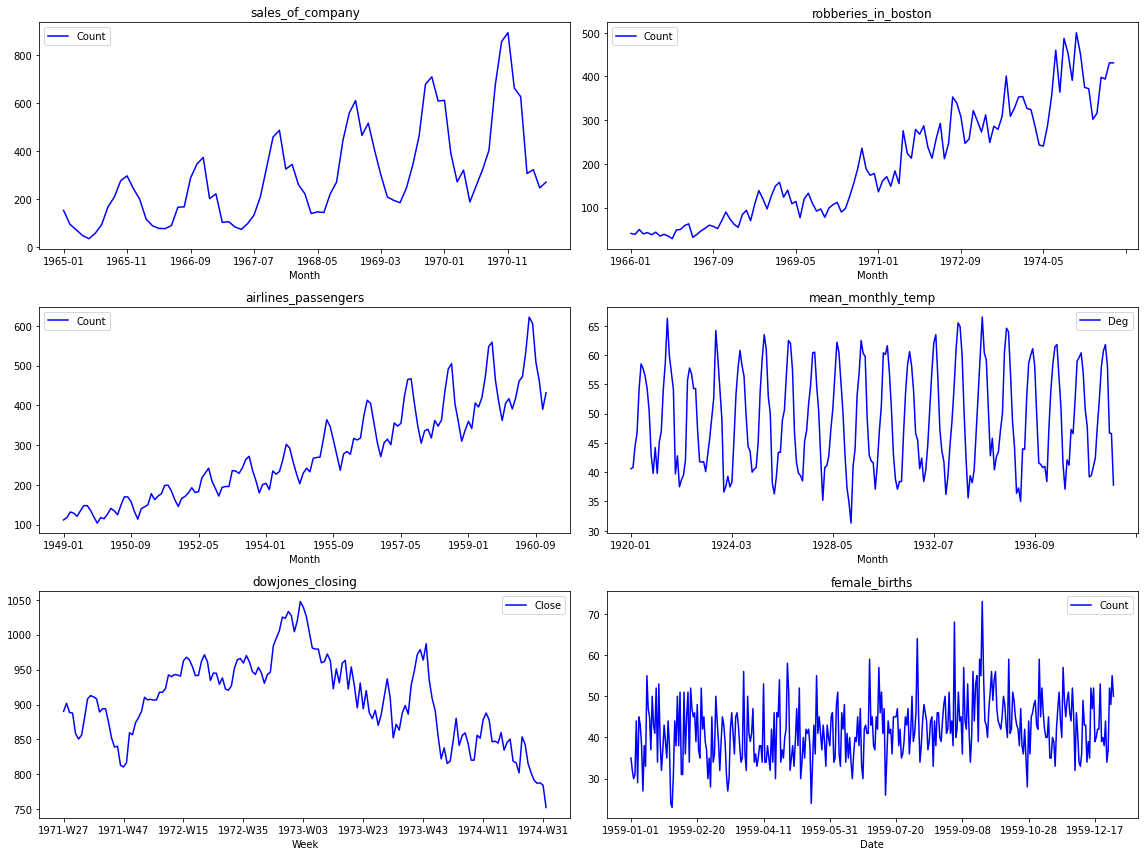

In [ ]:
plt.figure(figsize=(16, 12))
layout = (3, 2)
for i, key in enumerate(ts_dict.keys()):
    x = i % 2
    y = int((i - x) / 2)
        
    ts_ax = plt.subplot2grid(layout, (y, x))
    ts_dict[key].plot(ax=ts_ax, color='blue')
    ts_ax.set_title(key)
        
plt.tight_layout()

In [ ]:
# def trent_season_resid(series):
#   series['trend'] = series['Count'].rolling(13, center=True).mean()
#   series['detrended'] = series['Count'] - series['trend']
#   series.index = pd.to_datetime(series.index)
#   series["month"] = series.index.month
#   series["seasonality"] = series.groupby("month")["detrended"].transform("mean")
#   series["resid"] = series["detrended"] - series["seasonality"]
#   series["resid"].plot()

In [ ]:
def show_seasonal_decompose(ts_dict):

  for key, value in ts_dict.items():

    sd = seasonal_decompose(value, period=12, model="additive")

    plt.figure(figsize=(16, 12))
    plt.subplots_adjust(hspace=0.5)
    plt.subplot(3,1,1)
    plt.title('Trend ' + key)
    sd.trend.plot()
    plt.subplot(3,1,2)
    plt.title('Seasonal ' + key)
    sd.seasonal.plot()
    plt.subplot(3,1,3)
    plt.title('Resid ' + key)
    sd.resid.plot()

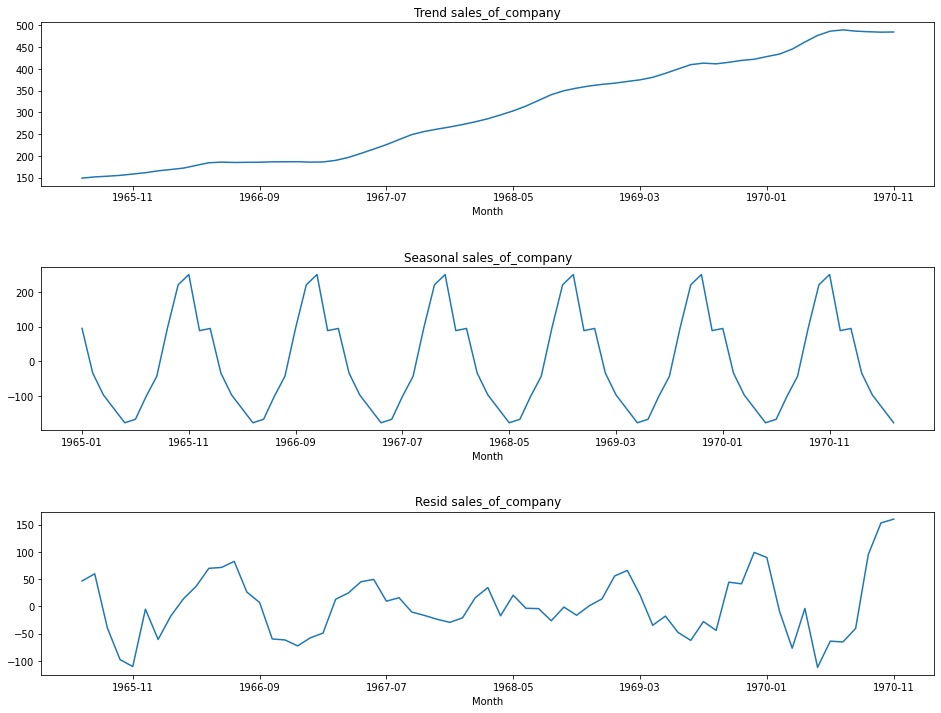

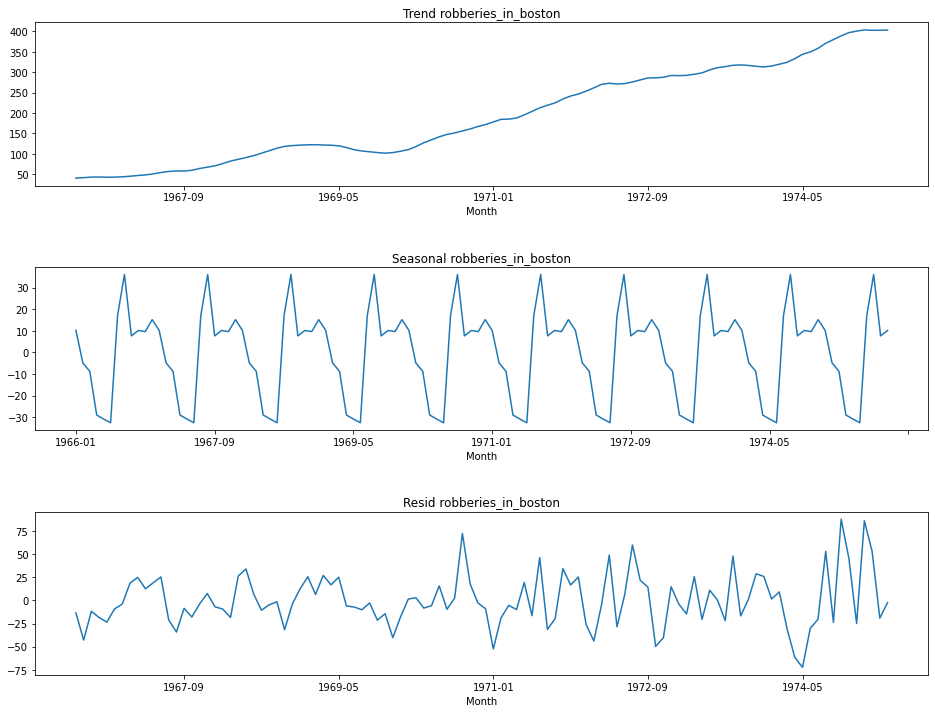

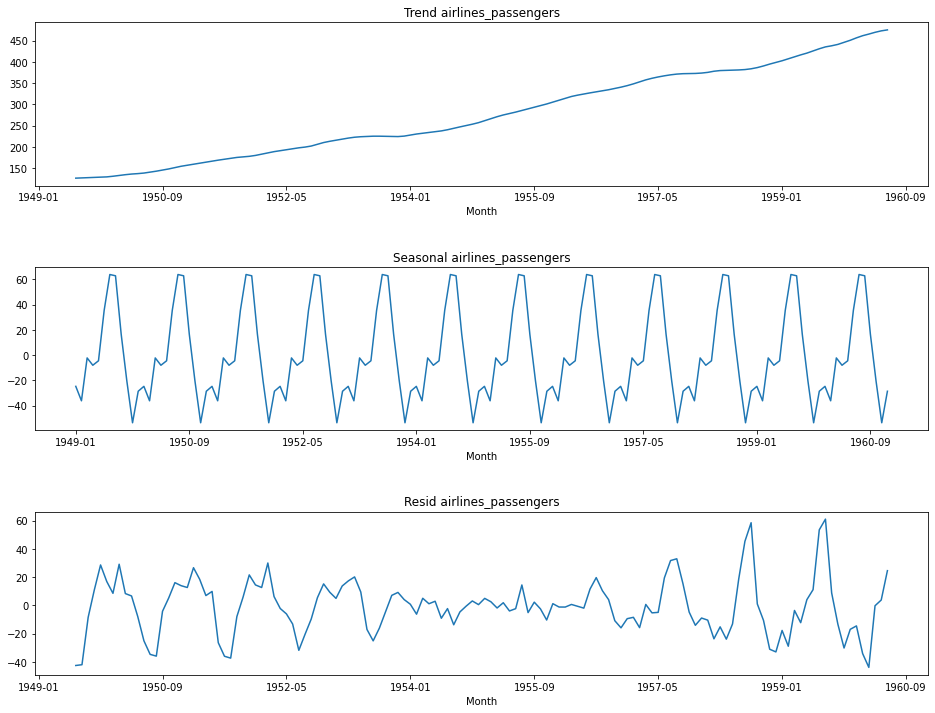

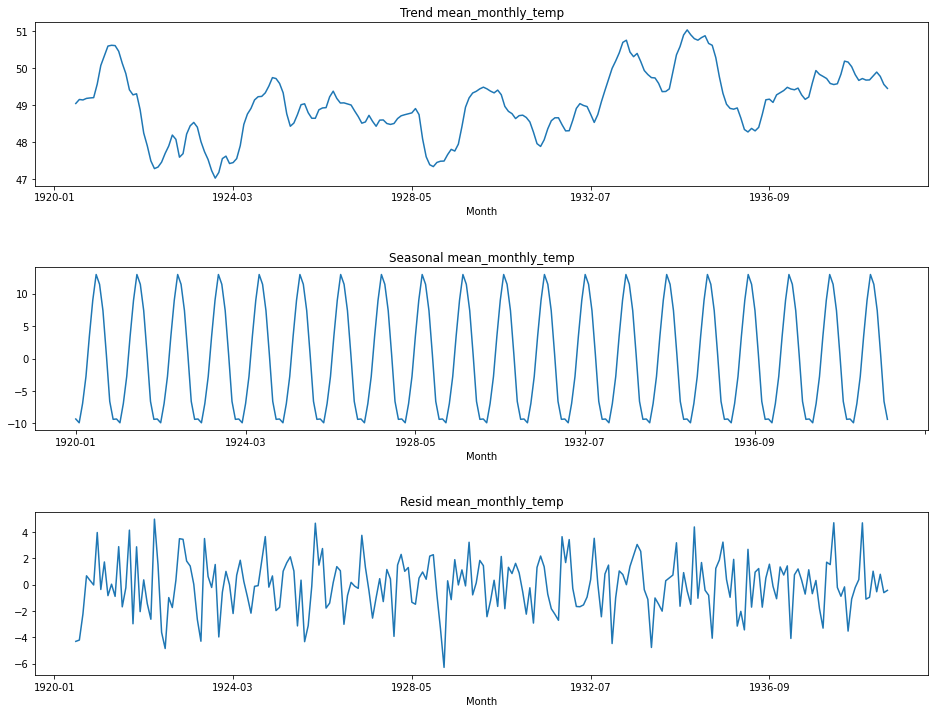

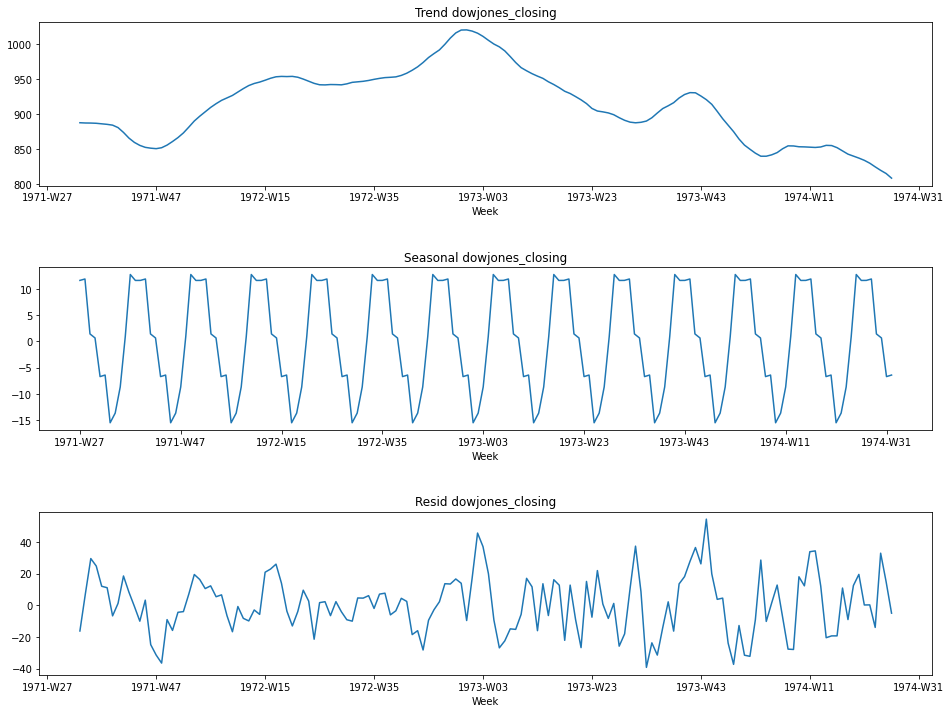

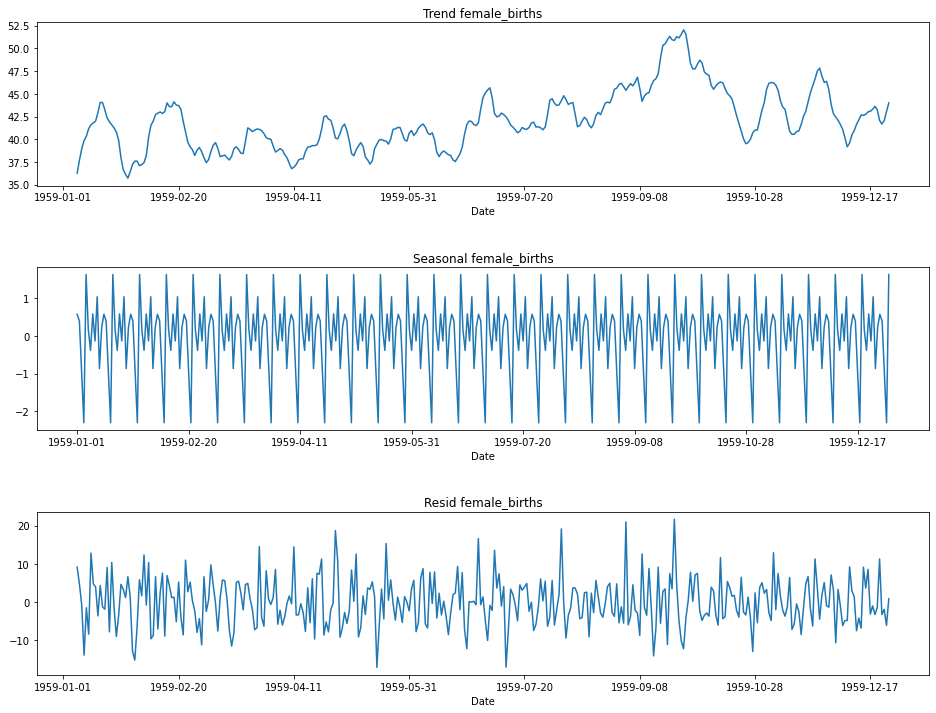

In [ ]:
show_seasonal_decompose(ts_dict)

In [ ]:
def df_test(ts_dict):
  for key, value in ts_dict.items():
    p_value = adfuller(value, autolag='AIC')
    if p_value[1] > 0.05:
      print(f'Series: {key}, P value: {p_value[1]}, не отвергают гипотезу о нестационарности ряда')
    else:
      print(f'Series: {key}, P value: {p_value[1]}, отвергают гипотезу, ряд - стационарный')

In [ ]:
df_test(ts_dict)

Series: sales_of_company, P value: 0.9888894205170052, не отвергают гипотезу о нестационарности ряда
Series: robberies_in_boston, P value: 0.9942775638057231, не отвергают гипотезу о нестационарности ряда
Series: airlines_passengers, P value: 0.991880243437641, не отвергают гипотезу о нестационарности ряда
Series: mean_monthly_temp, P value: 0.016989030222608947, отвергают гипотезу, ряд - стационарный
Series: dowjones_closing, P value: 0.6224548515589733, не отвергают гипотезу о нестационарности ряда
Series: female_births, P value: 5.2434129901498554e-05, отвергают гипотезу, ряд - стационарный


In [ ]:
ts_dict_new = {'sales_of_company': sales_of_company, 
           'robberies_in_boston': robberies_in_boston,
           'airlines_passengers': airlines_passengers,
           'dowjones_closing': dowjones_closing}

In [ ]:
def sigma_norm(ts_dict):
  bc_dict = {}
  for key, value in ts_dict.items():
    if key == 'dowjones_closing':
      series = boxcox(value['Close'], 0)   
      bc_dict[key] = series
    else:
      series = boxcox(value['Count'], 0)   
      bc_dict[key] = series

  df_test(bc_dict)

  for key, value in bc_dict.items():
    
    plot_acf(value, alpha = None)
    plt.title(key)
    plt.show()
  return bc_dict

Series: sales_of_company, P value: 0.785310212484911, не отвергают гипотезу о нестационарности ряда
Series: robberies_in_boston, P value: 0.28083250354255207, не отвергают гипотезу о нестационарности ряда
Series: airlines_passengers, P value: 0.4223667747703914, не отвергают гипотезу о нестационарности ряда
Series: dowjones_closing, P value: 0.6691194827577219, не отвергают гипотезу о нестационарности ряда


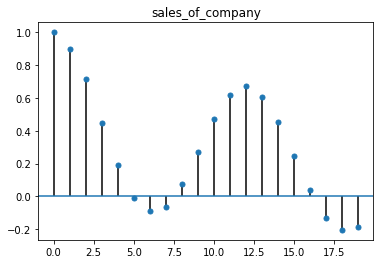

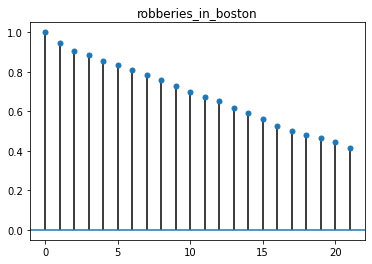

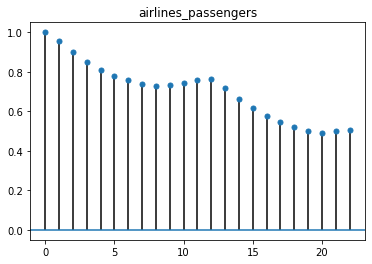

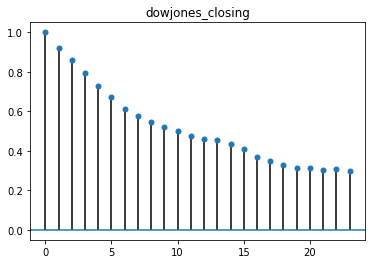

In [ ]:
bc_dict = sigma_norm(ts_dict_new)

После нормализации дисперсии стало лучше, но не достаточно, видим наличие тренда и сезонности, уберем их

In [ ]:
def trend_delete(bc_dict):
  result_dict = {}
  for key, value in bc_dict.items():
    series = value[1:] - value[:-1]
    result_dict[key] = series
    plt.title(key)
    plt.plot(series)
    plt.show()
    p_value = adfuller(series, autolag='AIC')
    if p_value[1] > 0.05:
      print(f'Series: {key}, P value: {p_value[1]}, не отвергают гипотезу о нестационарности ряда')
    else:
      print(f'Series: {key}, P value: {p_value[1]}, отвергают гипотезу, ряд - стационарный')
  return result_dict

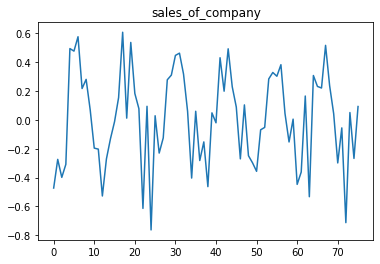

Series: sales_of_company, P value: 0.02402539283987472, отвергают гипотезу, ряд - стационарный


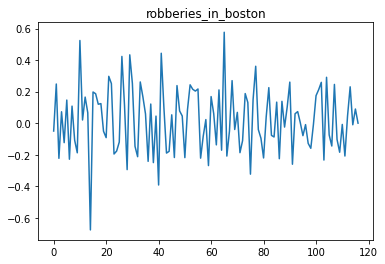

Series: robberies_in_boston, P value: 2.3786024417437596e-11, отвергают гипотезу, ряд - стационарный


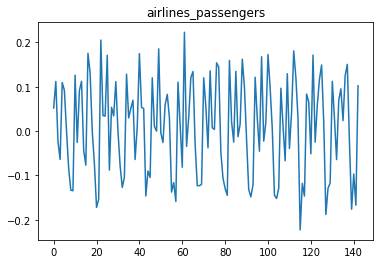

Series: airlines_passengers, P value: 0.0711205481508595, не отвергают гипотезу о нестационарности ряда


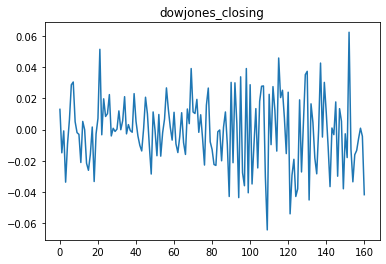

Series: dowjones_closing, P value: 2.7516091322913448e-24, отвергают гипотезу, ряд - стационарный


In [ ]:
result_dict = trend_delete(bc_dict)

Стало еще лучше, остался airlines_passengers как нестационарным рядом

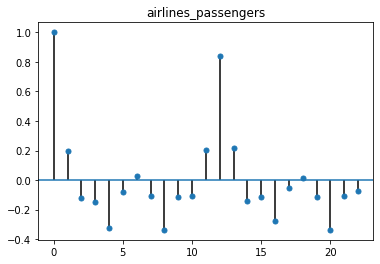

In [ ]:
plot_acf(result_dict['airlines_passengers'], alpha = None)
plt.title('airlines_passengers')
plt.show()

Видно влияние сезонности, попробуем убрать и ее тоже.

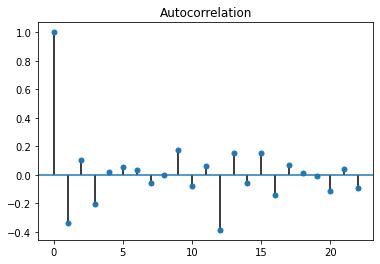

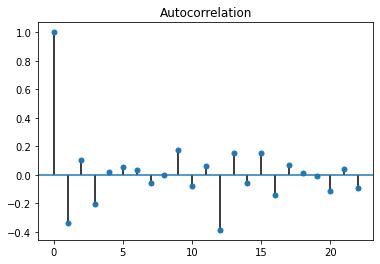

In [ ]:
plot_acf(result_dict['airlines_passengers'][12:] - result_dict['airlines_passengers'][:-12], alpha=None)


In [ ]:
p_value = adfuller(result_dict['airlines_passengers'][12:] - result_dict['airlines_passengers'][:-12], autolag='AIC')
if p_value[1] > 0.05:
   print(f'Series: airlines_passengers, P value: {p_value[1]}, не отвергают гипотезу о нестационарности ряда')
else:
   print(f'Series: airlines_passengers, P value: {p_value[1]}, отвергают гипотезу, ряд - стационарный')

Series: airlines_passengers, P value: 0.0002485912311384052, отвергают гипотезу, ряд - стационарный
